In [1]:
# Victor Z
# UW-Madison, 2023
# Weibull moment example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.stats import weibull_min

# Function to compute mismatch error
def myfun(param, X):
    Ehat = np.mean(X)
    Vhat = np.var(X)

    beta = param[0]
    xi = param[1]

    E = weibull_min.mean(c=xi, scale=beta)
    V = weibull_min.var(c=xi, scale=beta)

    err = np.array([E - Ehat, V - Vhat])
    return err

# Try few data points
S = 10

# Generate data using true model
# note there are discrepancies with Matlab due to use of different samples
beta = 1  # scale
xi = 2    # shape
np.random.seed(1)
X = weibull_min.rvs(c=xi, scale=beta, size=S)

In [3]:
# Estimates of moments
Ehat = np.mean(X)
Vhat = np.var(X)

print(Ehat)
print(Vhat)

# Solve moment matching equations numerically
p0 = [1, 1]
p = fsolve(myfun, p0, args=(X,))

# Estimated parameters
betahat = p[0]
xihat = p[1]

print(betahat)
print(xihat)

0.5879536222266075
0.0882060506900237
0.6637780422799439
2.0775929548894347


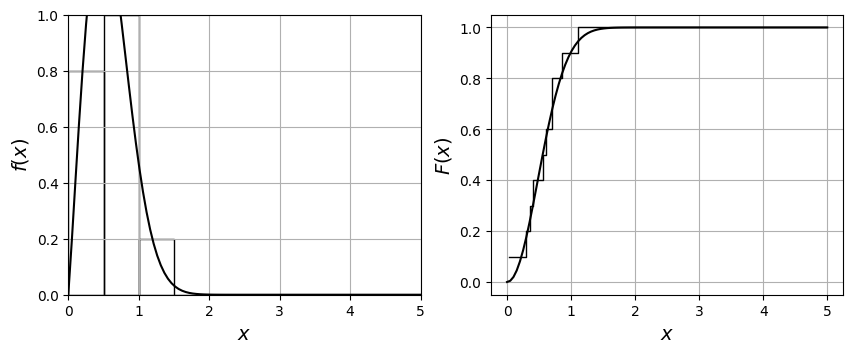

In [4]:
# Compare truth against estimate
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.hist(X, bins=np.arange(0, 5, 0.5), density=True, edgecolor='black', facecolor='none', linewidth=1)
x = np.linspace(0, 5, 100)
plt.plot(x, weibull_min.pdf(x, c=xihat, scale=betahat), color='black', linewidth=1.5)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)
plt.grid(True)
plt.axis([0, 5, 0, 1])

# Compute and plot empirical CDF
plt.subplot(2, 2, 2)
F, t = np.histogram(X, bins=np.linspace(0, 5, 100), density=True)
F = np.cumsum(F) / np.sum(F)
t = (t[:-1] + t[1:]) / 2
plt.step(t, F, where='mid', linewidth=1, color='black')
plt.plot(x, weibull_min.cdf(x, c=xihat, scale=betahat), color='black', linewidth=1.5)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$F(x)$', fontsize=14)
plt.grid(True)

In [5]:
# Try more data points
S = 100
np.random.seed(1)

# Generate data using true model
X = weibull_min.rvs(c=xi, scale=beta, size=S)

# Estimates of moments
Ehat = np.mean(X)
Vhat = np.var(X)

print(Ehat)
print(Vhat)

# Solve moment matching equations numerically
p = fsolve(myfun, p0, args=(X,))

# Estimated parameters
betahat = p[0]
xihat = p[1]

print(betahat)
print(xihat)

0.8591354547484467
0.21012576863333565
0.9689633490943079
1.9549687042346084


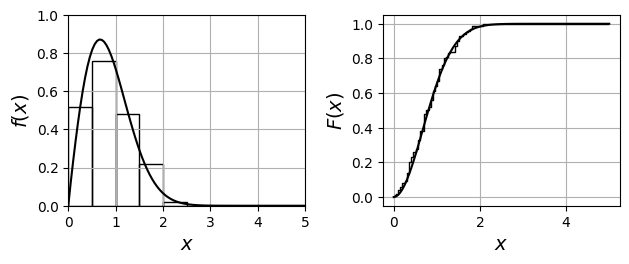

In [6]:
# Compare truth against estimate
plt.subplot(2, 2, 3)
plt.hist(X, bins=np.arange(0, 5, 0.5), density=True, edgecolor='black', facecolor='none', linewidth=1)
plt.plot(x, weibull_min.pdf(x, c=xihat, scale=betahat), color='black', linewidth=1.5)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)
plt.grid(True)
plt.axis([0, 5, 0, 1])

# Compute and plot empirical CDF
plt.subplot(2, 2, 4)
F, t = np.histogram(X, bins=np.linspace(0, 5, 100), density=True)
F = np.cumsum(F) / np.sum(F)
t = (t[:-1] + t[1:]) / 2
plt.step(t, F, where='mid', linewidth=1, color='black')
plt.plot(x, weibull_min.cdf(x, c=xihat, scale=betahat), color='black', linewidth=1.5)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$F(x)$', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()